# Trabajo integrador - Parte 2

# Aprendizaje Supervisado

**Nombre**:

## Problema de regresión

Para la creación de los datasets y la manipulación de los mismos vamos a trabajar directamente con dos módulos includios en la carpeta utils.

En esta podemos encontrar:
 - generate_data: Esta función wrappea el método de _make_regression_ de scikit learn para devolver un dataframe con un problema de regresión basado en sus parámetros.
 - generate_outliers: Esta función genera outliers livianos y pesados en función de los parámetros que le demos de entrada.

In [4]:
from utils.data_generation import generate_dataset
from utils.data_manipulation import generate_outliers

### Ejemplo de uso

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
## Vamos a crear un dataset primero.

data = generate_dataset(
    n_samples=1000,
    n_features=5,
    n_informative=2,
    n_targets=1,
    noise=0,
    output='dataframe'
)

## esto nos genera un dataset que contiene 5 features, 2 de los cuales son informativos, y 1 target.

data.head()

,x0,x1,x2,x3,x4,target
0,-0.751323,-0.581833,0.449501,0.018649,1.725009,-48.470150
1,-0.460124,0.923291,-0.001205,1.774407,0.032675,-28.033750
2,0.419232,-0.606170,-1.256678,0.150498,0.661342,25.845484
3,-0.539448,0.170224,0.501049,0.019239,0.515064,-34.043134
4,1.673101,0.480343,0.274284,-2.003239,0.888781,106.885323


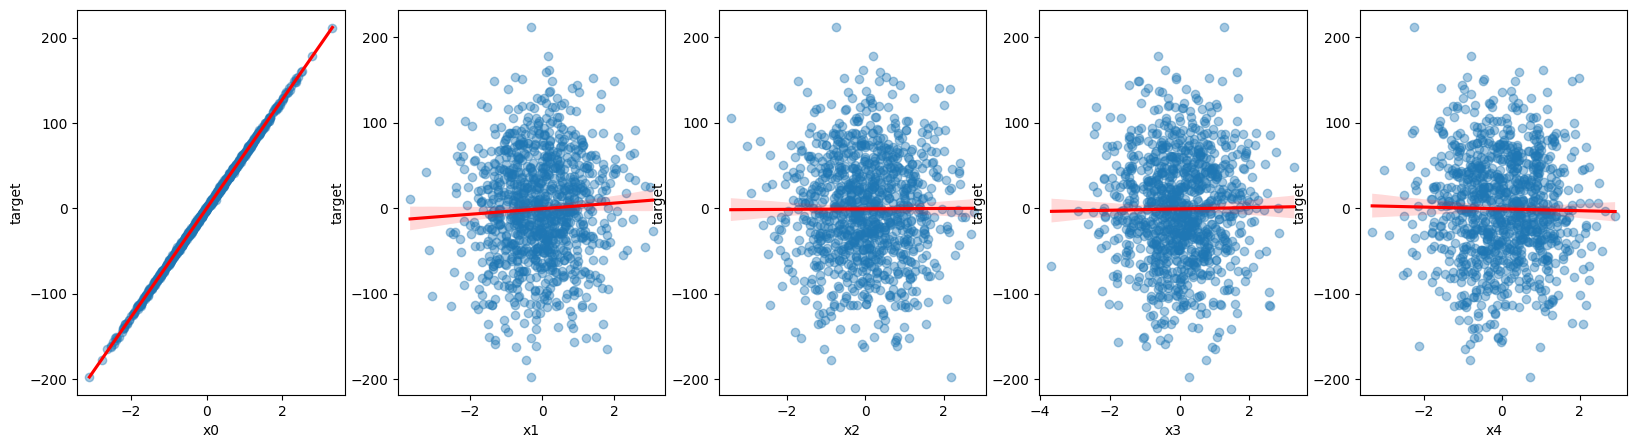

In [7]:
## vamos a visualizar estas variables
## creamos una figura de matplotlib que contenga 5 subplots, uno por cada feature:

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

## Creamos un loop para iterar sobre cada feature y graficar la regresión lineal entre cada feature y el target:

for i, feature in enumerate(data.columns[:-1]):
    sns.regplot(x=feature,
                y='target',
                data=data,
                ax=axes[i],
                scatter_kws={'alpha': 0.4},
                line_kws={'color': 'red'},
                ci=95)
    


Ahora agregamos _outliers_ a un nuevo dataset

In [8]:
data = generate_dataset(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=0,
    output='dataframe'
)



In [9]:
do1 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=False,
)
do2 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=True,
)
do3 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=False,
)



Text(0.5, 1.0, 'Outliers (one-tailed)')

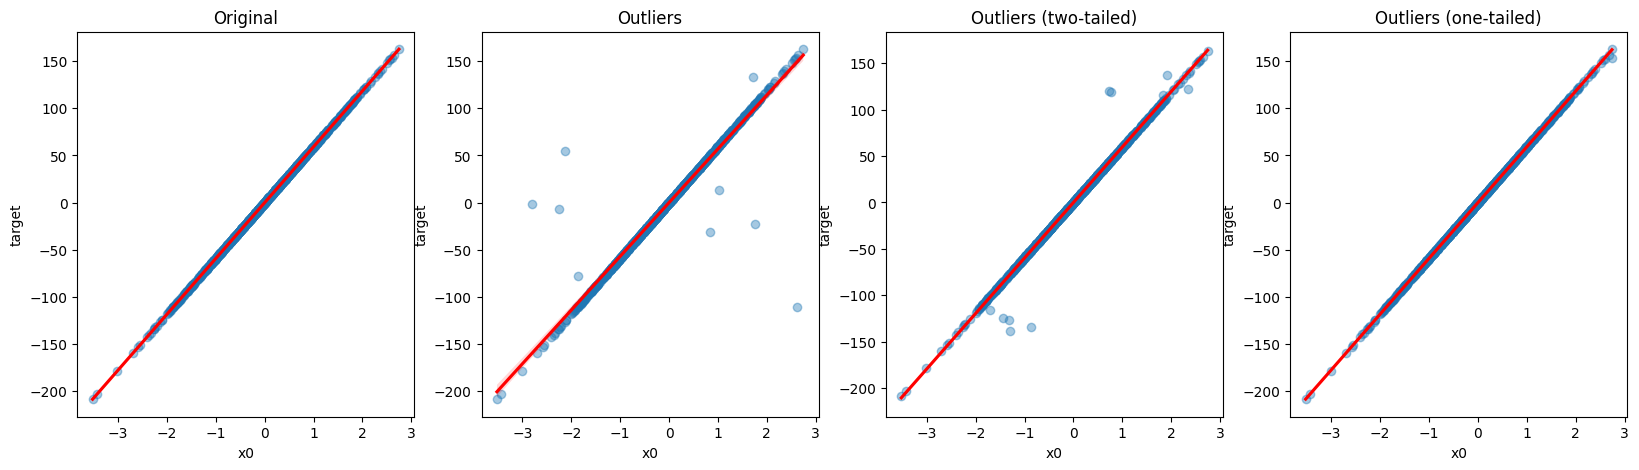

In [10]:
## vamos a visualizar estas los distintos datasets

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=do1,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')

sns.regplot(x='x0',
            y='target',
            data=do2,
            ax=axes[2],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[2].set_title('Outliers (two-tailed)')

sns.regplot(x='x0',
            y='target',
            data=do3,
            ax=axes[3],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[3].set_title('Outliers (one-tailed)')


Text(0.5, 1.0, 'Outliers')

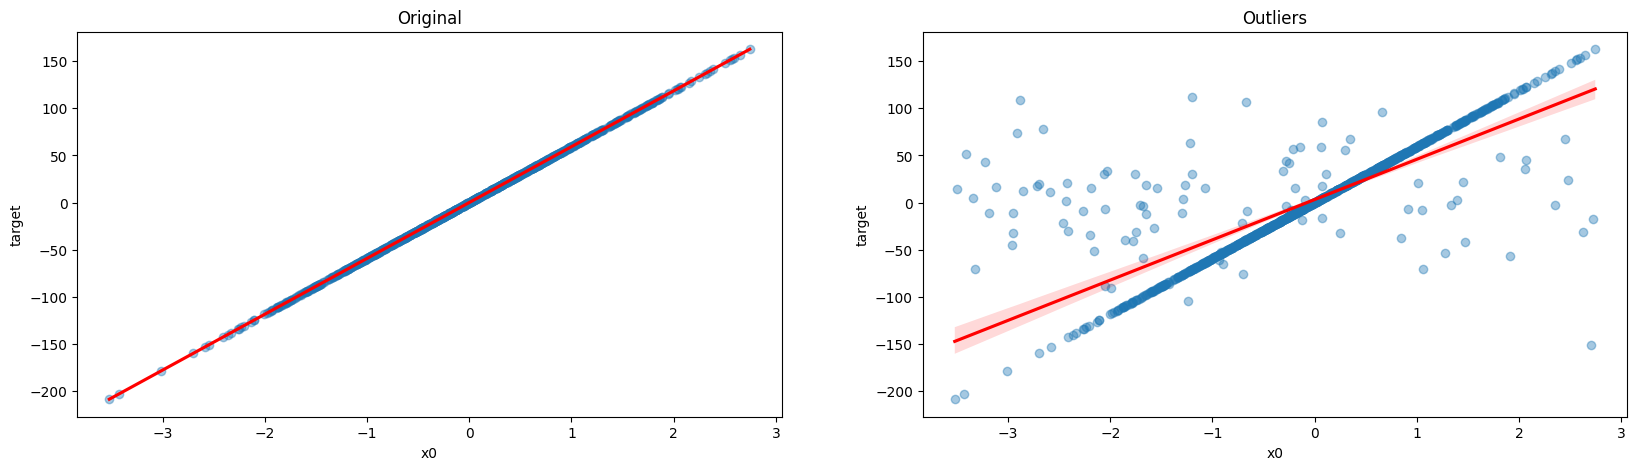

In [11]:
## y si lo queremos con mucho mas outliers?

doe = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.1,
    extreme_outliers=True)

## vamos a visualizar este caso

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=doe,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')


## Ejercicio 4

Utilizando la funcion `generate_data` generar un problema de regresión multivariada en el cual cuente con N variables informativas y M variables no informativas.

Ejemplo:
```python
data = generate_dataset(n_samples=1000,
                    n_features=10,
                    n_informative=5,
                    n_targets=1,
                    noise=20.0,
                    random_state=42,
                    output='dataframe')

```

Dado un valor de _noise_ fijo, sin fijar _random_state_ (para poder asegurarnos
que los datos que generamos son distintos) realizaremos 100 simulaciones de este dataset.

En la simulación deberemos generar el dataset, hacer una división de train-test, ajustar
un modelo de regresión lineal multivariada y validar el mismo.

En cada iteración de esta simulación debemos guardar:

- Los coeficientes de la regresión.
- El RMSE de train y test.
- El MAE de train y test. 


> Qué pasa con los coeficientes de las variables no informativas? La regresión se ve afectada por estas variables?
> ***HINT:*** Utilice las distribuciones de los coeficientes para analizar y test de hipótesis para sacar conclusiones.

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


In [13]:
## Parámetros de la simulación
n_exp = 10
n_samples = 100
n_features = 10
n_informative = 2
n_targets = 1
noise_level = 10.0

# noise = np.linspace(0, 100, 100)
# bias = np.linspace(0, 100, 20)

In [14]:
## Esqueleto de la simulación
"""
 def run_simulation(n_exp, n_samples, n_features, n_informative, n_targets, noise, bias):
     resultados = []
     for _ in tqdm(range(n_exp)):
        for b in bias:
            for n in noise:
                data = generate_dataset(
                n_samples=n_samples,
                n_features=n_features,
                n_informative=n_informative,
                n_targets=n_targets,
                noise=n,
                bias=b,
                output='dataframe'
            )
                
            
                X=data.drop('target',axis=1)
                y=data.target

                X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=None)

                model=LinearRegression()
                model.fit(X_train,y_train)

                y_train_pred=model.predict(X_train)
                y_test_pred=model.predict(X_test)

                mse_train=mean_squared_error(y_train, y_train_pred)
                mse_test=mean_squared_error(y_test,y_test_pred)

                mae_train=mean_absolute_error(y_train,y_train_pred)
                mae_test=mean_absolute_error(y_test,y_test_pred)

                coeficientes=model.coef_

                resultados.append({
                    'noise': n,
                    'bias' : b,
                    'rmse_train': np.sqrt(mse_train),
                    'rmse_test': np.sqrt(mse_test),
                    'mae_train': mae_train,
                    'mae_test': mae_test,
                    'coeficientes': coeficientes}
                )
    return resultados """








"\n def run_simulation(n_exp, n_samples, n_features, n_informative, n_targets, noise, bias):\n     resultados = []\n     for _ in tqdm(range(n_exp)):\n        for b in bias:\n            for n in noise:\n                data = generate_dataset(\n                n_samples=n_samples,\n                n_features=n_features,\n                n_informative=n_informative,\n                n_targets=n_targets,\n                noise=n,\n                bias=b,\n                output='dataframe'\n            )\n                \n            \n                X=data.drop('target',axis=1)\n                y=data.target\n\n                X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=None)\n\n                model=LinearRegression()\n                model.fit(X_train,y_train)\n\n                y_train_pred=model.predict(X_train)\n                y_test_pred=model.predict(X_test)\n\n                mse_train=mean_squared_error(y_train, y_train_pred)\n          

In [15]:
# simulation_results = run_simulation(n_exp, n_samples, n_features, n_informative, n_targets, noise, bias)

In [16]:
# Creacion de eptys arrays
coefficients = []
train_rmse = []
test_rmse = []
train_mae = []
test_mae = []

In [17]:
# Bucle de simulación
for _ in tqdm(range(n_exp)):
    data = generate_dataset(n_samples=n_samples,
                            n_features=n_features,
                            n_informative=n_informative,
                            n_targets=n_targets,
                            noise=noise_level,
                            output='dataframe')

    X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data['target'], test_size=0.3)

    # Fitear la regresión
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Métricas
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    train_mae.append(mean_absolute_error(y_train, y_train_pred))
    test_mae.append(mean_absolute_error(y_test, y_test_pred))

    # Guardar coeficientes
    coefficients.append(model.coef_)

100%|██████████| 10/10 [00:00<00:00, 121.67it/s]


In [19]:
coefficients=np.array(coefficients)
informative_coeffs = coefficients[:, :n_informative]  # Primeros n_informative coeficientes
non_informative_coeffs = coefficients[:, n_informative:]  # Resto de los coeficientes





In [20]:
print(informative_coeffs.shape)

(10, 2)


In [21]:
print(non_informative_coeffs.shape)

(10, 8)


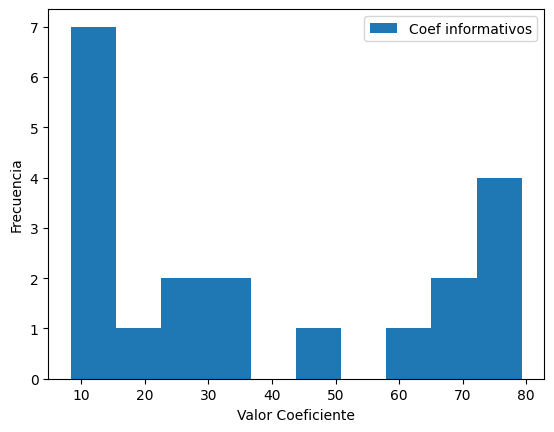

In [22]:
# Distribucion de coeficientes informativos 
plt.hist(informative_coeffs.flatten(),label='Coef informativos')
plt.xlabel('Valor Coeficiente')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


In [20]:
from scipy.stats import ttest_1samp

# Nivel de significancia (alfa)
alfa = 0.05

# Realizamos la prueba de hipótesis para cada coeficiente
# H0: El coeficiente es igual a cero
# H1: El coeficiente es diferente de cero
t_statistic, p_values = ttest_1samp(informative_coeffs, 0)

# Comparar el p-valor con el nivel de significancia alfa

for i, p_value in enumerate(p_values):   
    if p_value < alfa:
        print(f'Para el coeficiente {i+1}, rechazamos la hipótesis nula.')
    else:
        print(f'Para el coeficiente {i+1}, no hay suficiente evidencia para rechazar la hipótesis nula.')

Para el coeficiente 1, rechazamos la hipótesis nula.
Para el coeficiente 2, rechazamos la hipótesis nula.


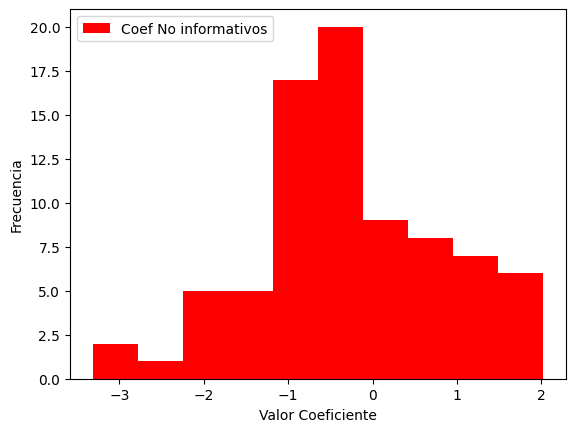

In [23]:
# # Distribucion de coeficientes no informativos 
plt.hist(non_informative_coeffs.flatten(),label='Coef No informativos', color= 'r')
plt.xlabel('Valor Coeficiente')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [22]:
# Nivel de significancia (alfa)
alfa = 0.05

# Realizamos la prueba de hipótesis para cada coeficiente
# H0: El coeficiente es igual a cero
# H1: El coeficiente es diferente de cero
t_statistic, p_values = ttest_1samp(non_informative_coeffs, 0)

    # Comparar el p-valor con el nivel de significancia alfa
for i, p_value in enumerate(p_values):   
    if p_value < alfa:
        print(f'Para el coeficiente {i+1}, rechazamos la hipótesis nula.')
    else:
        print(f'Para el coeficiente {i+1}, no hay suficiente evidencia para rechazar la hipótesis nula.')

Para el coeficiente 1, no hay suficiente evidencia para rechazar la hipótesis nula.
Para el coeficiente 2, no hay suficiente evidencia para rechazar la hipótesis nula.
Para el coeficiente 3, no hay suficiente evidencia para rechazar la hipótesis nula.
Para el coeficiente 4, no hay suficiente evidencia para rechazar la hipótesis nula.
Para el coeficiente 5, no hay suficiente evidencia para rechazar la hipótesis nula.
Para el coeficiente 6, no hay suficiente evidencia para rechazar la hipótesis nula.
Para el coeficiente 7, no hay suficiente evidencia para rechazar la hipótesis nula.
Para el coeficiente 8, no hay suficiente evidencia para rechazar la hipótesis nula.


## Ejercicio 5


Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:

1. Generamos un dataset de regresion lineal simple (1 feature y 1 target value) con `noise` fijo en 0.5.
2. Generamos outliers fijando `extreme_outliers`.
2. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
3. Simular con multiples porcentajes de outliers (desde 1% hasta 10%). Qué pasa con los modelos?

Los modelos a utilizar en este problema son:

    - Regresion Lineal simple
    - Regresion de Huber
    - Regresión Ridge

In [24]:
from sklearn.linear_model import LinearRegression, HuberRegressor, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


data = generate_dataset(n_samples=1000,
                    n_features=1,
                    n_informative=1,
                    n_targets=1,
                    noise=0.5,
                    random_state=42,
                    output='dataframe')

data


,x0,target
0,0.496714,8.456852
1,-0.138264,-2.714959
2,0.647689,11.753645
3,1.523030,25.687060
4,-0.234153,-3.725030
...,...,...
995,-0.281100,-4.817662
996,1.797687,30.835629
997,0.640843,10.734544
998,-0.571179,-9.655858


In [25]:
do1 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=False)


Text(0.5, 1.0, 'Outliers')

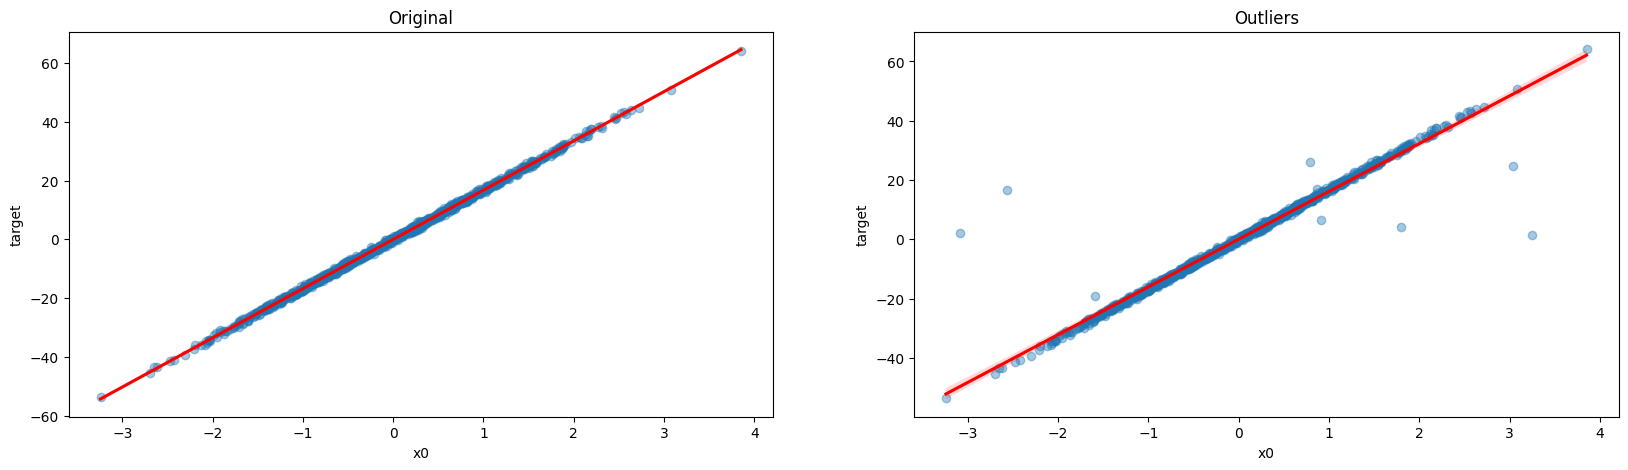

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')


sns.regplot(x='x0',
            y='target',
            data=do1,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')

In [27]:
# Inicializo modelos

linear_reg = LinearRegression()
huber_reg = HuberRegressor()
ridge_reg = RidgeCV(alphas=[0.1, 1.0, 10.0])

In [28]:
outlier_percentages = [0.01, 0.03, 0.05, 0.07, 0.1]
for percentage in outlier_percentages:
    data_outliers=generate_outliers(df=data,
    columns=['x0'],
    percentage=percentage,
    extreme_outliers=False,
    only_tails=False)

    # Separamos feature y target
    X=data_outliers['x0'].values.reshape(-1,1)
    y=data_outliers['target']

    # Split data
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

    # Entrenamiento de modelos

    linear_reg.fit(X_train, y_train)
    huber_reg.fit(X_train,y_train)
    ridge_reg.fit(X_train, y_train)

    # Predicciones

    y_pred_linear=linear_reg.predict(X_test)
    y_pred_huber=huber_reg.predict(X_test)
    y_pred_ridge=ridge_reg.predict(X_test)

    # Performance modelos
    mse_linear=mean_squared_error(y_test,y_pred_linear)
    mse_huber=mean_squared_error(y_test,y_pred_huber)
    mse_ridge=mean_squared_error(y_test,y_pred_ridge)

    print(f"Porcentaje de outliers: {percentage * 100} %")
    print(f"MSE Linear Regression: {mse_linear}")
    print(f"MSE Huber Regression: {mse_huber}")
    print(f"MSE Ridge Regression: {mse_ridge}")







Porcentaje de outliers: 1.0 %
MSE Linear Regression: 9.005104370383055
MSE Huber Regression: 9.050089426664902
MSE Ridge Regression: 9.021676700240635
Porcentaje de outliers: 3.0 %
MSE Linear Regression: 60.86620930774736
MSE Huber Regression: 68.21269388374746
MSE Ridge Regression: 60.80617449225712
Porcentaje de outliers: 5.0 %
MSE Linear Regression: 16.316714077756817
MSE Huber Regression: 9.464602881747485
MSE Ridge Regression: 16.39526868898865
Porcentaje de outliers: 7.000000000000001 %
MSE Linear Regression: 71.02438770378322
MSE Huber Regression: 86.57486111341913
MSE Ridge Regression: 71.02083041558868
Porcentaje de outliers: 10.0 %
MSE Linear Regression: 82.59155120055189
MSE Huber Regression: 106.7060773906289
MSE Ridge Regression: 82.72811617635783


## Problema de Clasificación

### Ejercicio 6

En este ejercicio vamos a jugar un poco con descenso de gradiente. Para esto consideremos lo visto en clase que es el problema de regresión.

Como paso inicial, vamos a sacarnos de encima la parte teórica. Recordemos que partimos del siguiente modelo

$$
y = \beta_0 + \beta_1 \cdot x
$$

En este caso nuestra función objetivo a optimizar será:

$$
MSE = ||y-\hat{y}||^2
$$


Para calcular el gradiente de la función de error cuadrático medio (MSE) con respecto a los parámetros $\beta_0$ y $\beta_1$, es útil primero expresar la función de coste de forma más explicita. Dado que $\hat{y} = \beta_0 + \beta_1 \cdot x$, podemos reescribir la función MSE como sigue:

$$
MSE(\beta_0, \beta_1) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i)^2
$$

Aquí, $N$ es el número de observaciones en el conjunto de datos y $y_i$ y $x_i$ son el valor observado y el valor de la característica correspondiente para la i-ésima observación.

El gradiente de la función de coste está compuesto por las derivadas parciales de la función de coste con respecto a cada uno de los parámetros. Así, el gradiente es un vector de la forma:

$$
\nabla MSE(\beta_0, \beta_1) = \left[ \frac{\partial MSE}{\partial \beta_0}, \frac{\partial MSE}{\partial \beta_1} \right]
$$

Las derivadas parciales se pueden calcular como sigue:

$$
\frac{\partial MSE}{\partial \beta_0} = \frac{-2}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i)
$$

$$
\frac{\partial MSE}{\partial \beta_1} = \frac{-2}{N} \sum_{i=1}^{N} x_i \cdot (y_i - \beta_0 - \beta_1 \cdot x_i)
$$

Así que finalmente tenemos:

$$
\nabla MSE(\beta_0, \beta_1) = \left[ \frac{-2}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i), \frac{-2}{N} \sum_{i=1}^{N} x_i \cdot (y_i - \beta_0 - \beta_1 \cdot x_i) \right]
$$

El cálculo del gradiente se usa en el descenso de gradiente para actualizar los parámetros $\beta_0$ y $\beta_1$ en cada iteración, en dirección opuesta al gradiente, para minimizar la función de coste.

Estos cálculos se pueden implementar en código Python de la siguiente manera:

```python
def gradient(X, y, beta0, beta1):
    N = len(y)
    y_hat = beta0 + beta1 * X

    d_beta0 = (-2/N) * np.sum(y - y_hat)
    d_beta1 = (-2/N) * np.sum(X * (y - y_hat))

    return d_beta0, d_beta1
```

Ahora, si quisieramos realizar esto de manera matricial, podemos hacer lo siguiente:

Primero, necesitamos cambiar la representación de nuestros datos. Podemos agregar un vector de unos a nuestra matriz de características para representar el término de intersección $\beta_0$. De esta manera, $X$ toma esta forma:

$$
X = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N \\
\end{bmatrix}
$$

Y nuestro vector de parámetros $\theta$ se verá así:

$$
\theta = \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\end{bmatrix}
$$

Entonces, nuestra predicción $\hat{y}$ se calcula como $X\theta$:

$$
\hat{y} = X\theta = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N \\
\end{bmatrix} \cdot \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\end{bmatrix}
$$

Nuestra función de coste MSE se ve de la siguiente manera en forma matricial:

$$
MSE(\theta) = \frac{1}{N} (y - X\theta)^T (y - X\theta)
$$

Las derivadas parciales de esta función de coste con respecto a los parámetros se pueden calcular de la siguiente manera:

$$
\frac{\partial MSE}{\partial \theta} = \frac{-2}{N} X^T (y - X\theta)
$$


Esto se puede implementar en Python de la siguiente manera:

In [29]:
def gradient(X: np.ndarray, y: np.ndarray, theta: np.ndarray) -> np.ndarray:
    """
    Esta función calcula el gradiente de la función de coste del error cuadrático medio (MSE)
    para una regresión lineal simple. La función toma como entrada la matriz de características X,
    el vector de observaciones y y el vector de parámetros theta, y devuelve el gradiente, que
    es un vector de las mismas dimensiones que theta.

    Params:
    X : numpy.ndarray
        La matriz de características extendida que incluye un vector de unos. De tamaño (N, d),
        donde N es el número de observaciones y d es el número de características (incluyendo el
        término de intersección).

    y : numpy.ndarray
        El vector de observaciones. De tamaño (N,), donde N es el número de observaciones.

    theta : numpy.ndarray
        El vector de parámetros. De tamaño (d,), donde d es el número de características
        (incluyendo el término de intersección).

    Returns:
    grad : numpy.ndarray
        El gradiente de la función de coste. Un vector de las mismas dimensiones que theta.

    Examples:
    >>> X = np.array([[1, 1], [1, 2], [1, 3]])
    >>> y = np.array([2, 3, 4])
    >>> theta = np.array([0, 0])
    >>> gradient(X, y, theta)
    array([-4., -8.])
    """
    N = len(y)
    y_hat = X.dot(theta)

    grad = (-2 / N) * X.T.dot(y - y_hat)

    return grad


Aquí, `X` es la matriz de características extendida que incluye un vector de unos, `y` es el vector de observaciones, y `theta` es el vector de parámetros. La función devuelve el gradiente, que es un vector de las mismas dimensiones que `theta`.

#### Gradiente Descendente

Ahora que sabemos calcular el gradiente, vamos a:

1. Crear una función _GD_ que compute el gradiente descendente. Debe tener condición de frenado
por nr de épocas pero también por tolerancia.
2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.
4. Tratamos de calcular los mejores parámetros con el algoritmo.
5. Guardamos la función de perdida en train y test en cada época.

In [30]:
import numpy as np
data_gd = generate_dataset(n_samples=1000,
                    n_features=1,
                    n_informative=1,
                    n_targets=1,
                    bias=500.0,
                    noise=1000.0,
                    random_state=42,
                    output='dataframe')

data


,x0,target
0,0.496714,8.456852
1,-0.138264,-2.714959
2,0.647689,11.753645
3,1.523030,25.687060
4,-0.234153,-3.725030
...,...,...
995,-0.281100,-4.817662
996,1.797687,30.835629
997,0.640843,10.734544
998,-0.571179,-9.655858


In [31]:
# Inicializo random theta
np.random.seed(42)
random_theta=np.zeros(2)
random_theta


array([0., 0.])

### Realizo alguna pruebas

In [31]:
# Matriz de caracterisiticas extendidas

# Genero matriz de 1 para la N filas
coef_ind_ones=np.ones(data_gd.shape[0])

# Cocateno con columna data['x0']
X=np.c_[coef_ind_ones,data.x0]

X

array([[ 1.        ,  0.49671415],
       [ 1.        , -0.1382643 ],
       [ 1.        ,  0.64768854],
       ...,
       [ 1.        ,  0.64084286],
       [ 1.        , -0.57117899],
       [ 1.        ,  0.57258278]])

In [32]:
# Vector de observaciones

y=data.target
y

0       8.456852
1      -2.714959
2      11.753645
3      25.687060
4      -3.725030
         ...    
995    -4.817662
996    30.835629
997    10.734544
998    -9.655858
999     9.631021
Name: target, Length: 1000, dtype: float64

### Resolución

Parámetros óptimos: [50.57588166 17.06030628]
Historial de pérdida en train: [3672.9701673572454, 3560.3703377441957, 3452.2792889298667, 3348.5164650018514, 3248.9085409685667, 3153.289133156288, 3061.498521205655, 2973.3833812030325, 2888.7965295007057, 2807.596676797791, 2729.648192070844, 2654.8208759596537, 2582.9897432294947, 2514.0348139462694, 2447.840913015568, 2384.297477750616, 2323.298373147533, 2264.741714559174, 2208.52969747122, 2154.5684340960433, 2102.7677965112584, 2053.0412660808274, 2005.305788907075, 1959.481637072052, 1915.4922754363613, 1873.2642337728512, 1832.7269840214983, 1793.8128224603531, 1756.4567565956465, 1720.5963965820392, 1686.1718509915704, 1653.1256267571164, 1621.402533123173, 1590.9495894434453, 1561.7159366711705, 1533.652752394274, 1506.713169273381, 1480.8521967463778, 1456.0266458687065, 1432.1950571637874, 1409.317631363013, 1387.3561629195742, 1366.273976185029, 1346.0358641419607, 1326.6080295903462, 1307.958028689369, 1290.0547167603265, 

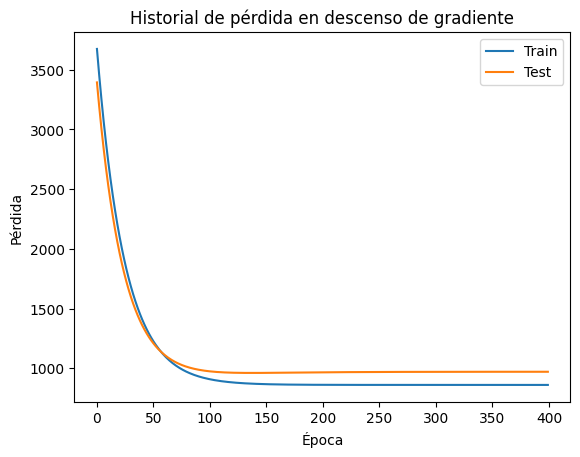

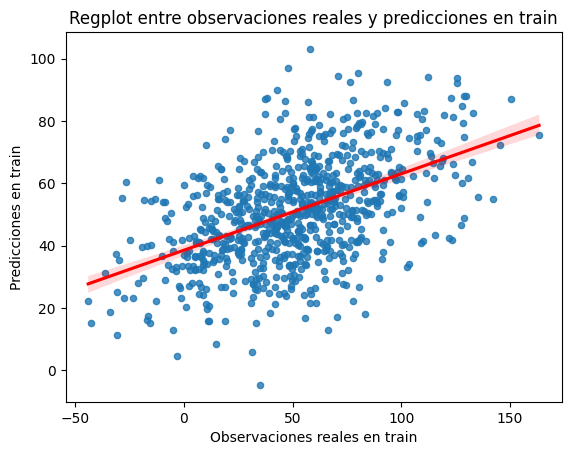

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Creación de dataset
data_gd = generate_dataset(n_samples=1000, n_features=1, n_informative=1, n_targets=1, bias=50.0, noise=30.0, random_state=42, output='dataframe')

# Función de cálculo de gradiente
def gradient(X: np.ndarray, y: np.ndarray, theta: np.ndarray) -> np.ndarray:
    N = len(y)
    y_hat = X.dot(theta)
    grad = (-2 / N) * X.T.dot(y - y_hat)
    return grad

# Función de descenso de gradiente con evaluación en train y test
def GD_with_evaluation(X_train, y_train, X_test, y_test, learning_rate=0.01, max_epochs=1000, tolerance=1e-5):
    N_train, d = X_train.shape
    theta = np.random.rand(d)  # Inicialización aleatoria de los parámetros
    loss_history_train = []
    loss_history_test = []

    for epoch in range(max_epochs):
        # Calcular predicciones en train y test
        y_train_pred = X_train.dot(theta)
        y_test_pred = X_test.dot(theta)

        # Calcular el gradiente en train
        gradiente_train = gradient(X_train, y_train, theta)

        # Actualizar los parámetros en train
        theta -= learning_rate * gradiente_train

        # Calcular la función de pérdida en train
        loss_train = mean_squared_error(y_train, y_train_pred)
        loss_history_train.append(loss_train)

        # Calcular la función de pérdida en test
        loss_test = mean_squared_error(y_test, y_test_pred)
        loss_history_test.append(loss_test)

        # Condición de parada basada en la mejora de la función de pérdida
        if epoch > 0 and abs(loss_history_train[epoch - 1] - loss_history_train[epoch]) < tolerance:
            break

    return theta, loss_history_train, loss_history_test

# Dividir los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(data_gd[['x0']], data_gd['target'], test_size=0.2, random_state=42)

# Agregar una columna de unos a X para el término de intersección en train y test
X_train_extended = np.c_[np.ones(X_train.shape[0]), X_train.values]
X_test_extended = np.c_[np.ones(X_test.shape[0]), X_test.values]

# Aplicar el descenso de gradiente con evaluación en train y test
optimal_beta, loss_history_train, loss_history_test = GD_with_evaluation(X_train_extended, y_train.values, X_test_extended, y_test.values)

# Impresión de resultados
print("Parámetros óptimos:", optimal_beta)
print("Historial de pérdida en train:", loss_history_train)
print("Historial de pérdida en test:", loss_history_test)

# Gráfica de la función de pérdida en cada época para train y test
plt.plot(loss_history_train, label='Train')
plt.plot(loss_history_test, label='Test')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Historial de pérdida en descenso de gradiente')
plt.legend()
plt.show()

# Regplot entre observaciones reales y predicciones en train
sns.regplot(x=y_train, y=X_train_extended.dot(optimal_beta), scatter_kws={'s': 20}, line_kws={'color': 'red'})
plt.xlabel('Observaciones reales en train')
plt.ylabel('Predicciones en train')
plt.title('Regplot entre observaciones reales y predicciones en train')
plt.show()


#### Gradiente Descendente Estocástico

Ahora que sabemos calcular el gradiente, vamos a:

1. Crear una función _SGD_ que compute el gradiente descendente estocástico.
2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.
4. Tratamos de calcular los mejores parámetros con el algoritmo.
5. Guardamos la función de perdida en train y test en cada época.

Epoch 1/300, Train MSE: 3337.4531111927226, Test MSE: 3084.4951808462665
Epoch 2/300, Train MSE: 3041.9077135006887, Test MSE: 2814.1649149814366
Epoch 3/300, Train MSE: 2781.715687623725, Test MSE: 2577.3123983687437
Epoch 4/300, Train MSE: 2552.5690285652727, Test MSE: 2369.7481698285114
Epoch 5/300, Train MSE: 2350.7039830725275, Test MSE: 2187.8894678133265
Epoch 6/300, Train MSE: 2173.0106502181034, Test MSE: 2028.728172249529
Epoch 7/300, Train MSE: 2016.5525229303382, Test MSE: 1889.4550677176826
Epoch 8/300, Train MSE: 1878.6326207016132, Test MSE: 1767.5082433926984
Epoch 9/300, Train MSE: 1757.1570297322655, Test MSE: 1660.8485057928647
Epoch 10/300, Train MSE: 1650.322453002241, Test MSE: 1567.7712316901464
Epoch 11/300, Train MSE: 1556.1223575312958, Test MSE: 1486.3791289354094
Epoch 12/300, Train MSE: 1473.221410195333, Test MSE: 1415.371654249141
Epoch 13/300, Train MSE: 1400.2145932765807, Test MSE: 1353.4276467859731
Epoch 14/300, Train MSE: 1335.8362117550757, Test MS

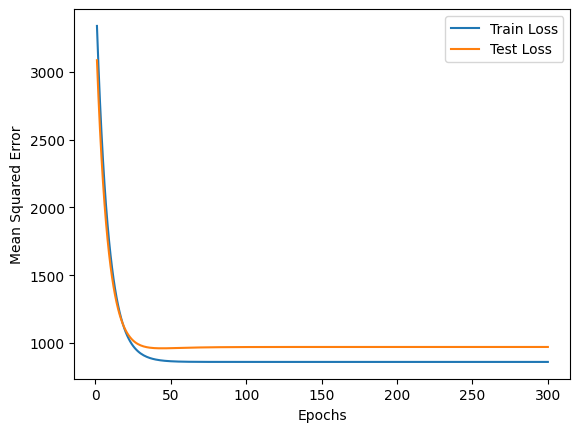

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

    
def stochastic_gradient_descent(X_train, y_train, X_test, y_test, learning_rate=0.01, epochs=300, batch_size=128):
    np.random.seed(42)
    coefficients = np.random.rand(X_train.shape[1])
    
    train_losses = []
    test_losses = []

    num_observations_train = X_train.shape[0]
    num_observations_test = X_test.shape[0]

    for epoch in range(epochs):
        indices_train = np.random.permutation(num_observations_train)
        X_train_shuffled = X_train[indices_train]
        y_train_shuffled = y_train[indices_train]

        for i in range(0, num_observations_train, batch_size):
            X_batch = X_train_shuffled[i:i+batch_size]
            y_batch = y_train_shuffled[i:i+batch_size]

            y_pred = np.dot(X_batch, coefficients)
            error = y_pred - y_batch

            gradient = np.dot(X_batch.T, error) / batch_size
            coefficients -= learning_rate * gradient

        # Calcular pérdida en entrenamiento y prueba
        train_loss = mean_squared_error(y_train, np.dot(X_train, coefficients))
        test_loss = mean_squared_error(y_test, np.dot(X_test, coefficients))

        train_losses.append(train_loss)
        test_losses.append(test_loss)

        print(f'Epoch {epoch + 1}/{epochs}, Train MSE: {train_loss}, Test MSE: {test_loss}')

    return coefficients, train_losses, test_losses

# Genero datos y divido en conjuntos de entrenamiento y prueba
data_sgd = generate_dataset(n_samples=1000, n_features=1, n_informative=1, n_targets=1, bias=50.0, noise=30.0, random_state=42, output='dataframe')
X = np.c_[np.ones(data_sgd.shape[0]), data_sgd['x0'].values]
y = data_sgd['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo y obtención de pérdidas
coefficients, train_losses, test_losses = stochastic_gradient_descent(X_train, y_train, X_test, y_test)

# Imprimo los coeficientes finales
print('Coeficientes finales:', coefficients)

# Gráfica de la pérdida en entrenamiento y prueba
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(test_losses) + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()




In [39]:
indices_train = np.random.permutation(X_train.shape[0])
indices_train

array([ 57, 650, 411, 497, 708, 753, 794, 569,  68, 221, 276, 237, 232,
       514, 755, 294, 732, 245, 397, 496, 141, 142, 600, 660, 127,  21,
       259, 174, 693, 444, 515, 488, 750, 429, 149, 746, 747, 249, 712,
       483, 110, 116, 342, 452, 455,  23, 356, 134, 227, 115, 594, 178,
       162, 365, 120, 759, 387, 331, 625, 763, 469, 657, 690, 378, 226,
       644, 380, 241, 301, 147, 448,  71,   8,   1, 590, 319, 493, 271,
       415, 438, 776, 624, 542, 140, 150, 711, 451,  77, 220, 366, 769,
         2, 768, 187, 407,  28, 251, 633, 439, 521, 738, 481, 639, 169,
       156, 541, 302, 327, 610, 740, 250, 662, 262, 728, 460, 124, 573,
       760, 674, 722, 247, 582, 446, 640, 117, 255, 328, 435,  79, 512,
       345, 441,  65, 717, 406,  97, 340, 536, 101, 479, 580, 758, 376,
       475, 426, 697, 143, 524, 119,  19, 526, 636,   6, 139, 412, 736,
        30, 312, 402, 382,  60, 784, 414, 453, 539,  37, 622, 372, 203,
       394, 344, 348, 377, 264, 716,  36, 664, 638, 336, 107, 38

Analice:

1. Cómo se comportan estos algoritmos? se puede ver la diferencia entre SGD y GD?.
2. Cómo afecto el _learning rate_ a estos algoritmos? Realice una simulación del mismo cambiando el `lr`.
3. Compare en una curva de Perdida vs Epoch los dos algoritmos. Nota algo interesante?

Epoch 1/300, Train MSE: 3337.4531111927226, Test MSE: 3084.4951808462665
Epoch 2/300, Train MSE: 3041.9077135006887, Test MSE: 2814.1649149814366
Epoch 3/300, Train MSE: 2781.715687623725, Test MSE: 2577.3123983687437
Epoch 4/300, Train MSE: 2552.5690285652727, Test MSE: 2369.7481698285114
Epoch 5/300, Train MSE: 2350.7039830725275, Test MSE: 2187.8894678133265
Epoch 6/300, Train MSE: 2173.0106502181034, Test MSE: 2028.728172249529
Epoch 7/300, Train MSE: 2016.5525229303382, Test MSE: 1889.4550677176826
Epoch 8/300, Train MSE: 1878.6326207016132, Test MSE: 1767.5082433926984
Epoch 9/300, Train MSE: 1757.1570297322655, Test MSE: 1660.8485057928647
Epoch 10/300, Train MSE: 1650.322453002241, Test MSE: 1567.7712316901464
Epoch 11/300, Train MSE: 1556.1223575312958, Test MSE: 1486.3791289354094
Epoch 12/300, Train MSE: 1473.221410195333, Test MSE: 1415.371654249141
Epoch 13/300, Train MSE: 1400.2145932765807, Test MSE: 1353.4276467859731
Epoch 14/300, Train MSE: 1335.8362117550757, Test MS

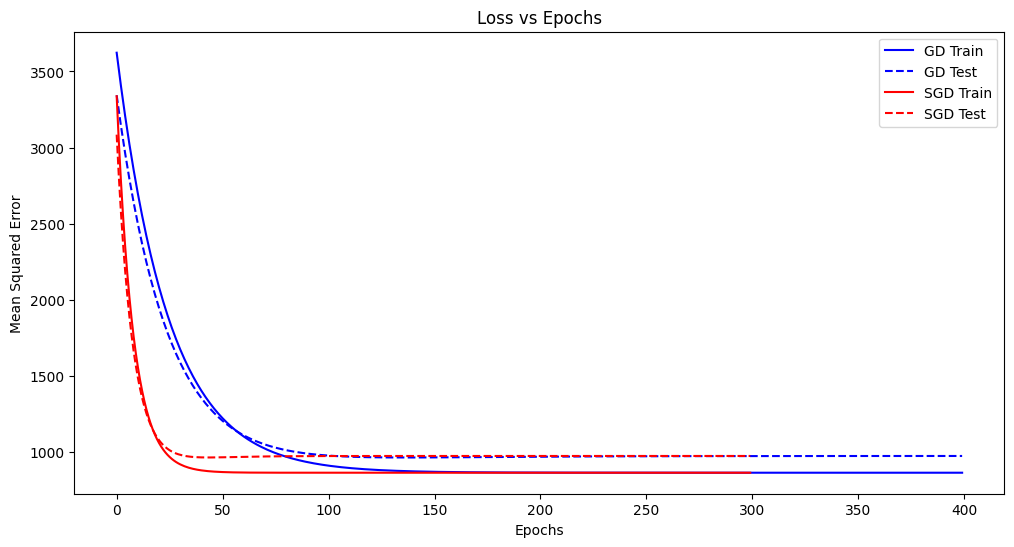

In [35]:
# Función para visualizar el comportamiento de GD y SGD
def visualize_algorithm_behavior(X_train, y_train, X_test, y_test, learning_rate_gd=0.01, learning_rate_sgd=0.01):
    theta_gd, loss_history_train_gd, loss_history_test_gd = GD_with_evaluation(X_train, y_train, X_test, y_test, learning_rate=learning_rate_gd)
    theta_sgd, loss_history_train_sgd, loss_history_test_sgd = stochastic_gradient_descent(X_train, y_train, X_test, y_test, learning_rate=learning_rate_sgd)

    plt.figure(figsize=(12, 6))
    plt.plot(loss_history_train_gd, label='GD Train', linestyle='-', color='blue')
    plt.plot(loss_history_test_gd, label='GD Test', linestyle='--', color='blue')
    plt.plot(loss_history_train_sgd, label='SGD Train', linestyle='-', color='red')
    plt.plot(loss_history_test_sgd, label='SGD Test', linestyle='--', color='red')

    plt.title('Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

# Uso de la función
visualize_algorithm_behavior(X_train, y_train, X_test, y_test)


1- Sabemos que tanto GD como SGD son algoritmos de optimización pero su diferencia crucial cae en la forma que se usa el conjunto para el entrenamiento. El GD utiliza todo el conjunto de entrenamiento y luego actualiza en direccion opuesta al gradiente en cambio el modelo de SGD solo utiliza un parte (batch size) del set de entrenamiento (azar en cada iteración). Se puede ver que computacionalmente, el GD, es mas costoso (+ lento) ya que utiliza todo el conjunto de datos pero tambien se puede ver en la curvas antes presentadas que tiene actualizaciones mas suaves en cambio SGD sera más rapido pero las actualizaciones del gradiente son mas ruidosas. 

3- Con respecto a la perdida en funcion de los epochs se puede ver (utilizando la tecnica del codo) que SGD requiere de menos epochs pera "converger".

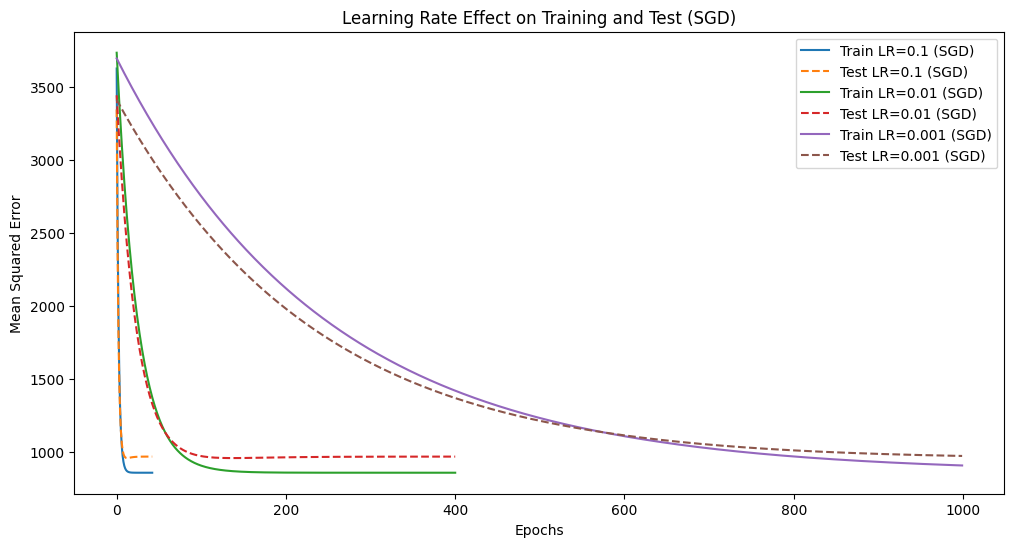

In [36]:
# Simulacion con distintos learning rate en GD
def simulate_learning_rate_effect(X_train, y_train, X_test, y_test, learning_rates=[0.1, 0.01, 0.001]):

    plt.figure(figsize=(12, 6))

    for lr in learning_rates:
        _,loss_history_train, loss_history_test = GD_with_evaluation(X_train, y_train, X_test, y_test, learning_rate=lr)
        plt.plot(loss_history_train, label=f'Train LR={lr} (SGD)')
        plt.plot(loss_history_test, label=f'Test LR={lr} (SGD)', linestyle='--')

    plt.title('Learning Rate Effect on Training and Test (SGD)')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

# Uso de la función
simulate_learning_rate_effect(X_train, y_train, X_test, y_test)

Epoch 1/300, Train MSE: 1602.0099618235724, Test MSE: 1526.7390868187283
Epoch 2/300, Train MSE: 1054.4194755164626, Test MSE: 1073.3333446146428
Epoch 3/300, Train MSE: 911.9755413239542, Test MSE: 977.2343160377567
Epoch 4/300, Train MSE: 874.3344284991229, Test MSE: 961.2547715208854
Epoch 5/300, Train MSE: 864.1605395164306, Test MSE: 962.8650468944323
Epoch 6/300, Train MSE: 861.7347987888296, Test MSE: 965.6861959159119
Epoch 7/300, Train MSE: 861.1259223430816, Test MSE: 967.4270946112033
Epoch 8/300, Train MSE: 860.8213471574024, Test MSE: 970.0212246613565
Epoch 9/300, Train MSE: 860.7524667894488, Test MSE: 970.4912839456669
Epoch 10/300, Train MSE: 860.7754541696382, Test MSE: 970.0643161955539
Epoch 11/300, Train MSE: 860.7629055613231, Test MSE: 971.1855974988644
Epoch 12/300, Train MSE: 860.7615944038589, Test MSE: 970.6184465892505
Epoch 13/300, Train MSE: 860.7668450867437, Test MSE: 970.1189506629103
Epoch 14/300, Train MSE: 860.7493793445263, Test MSE: 971.18581198054

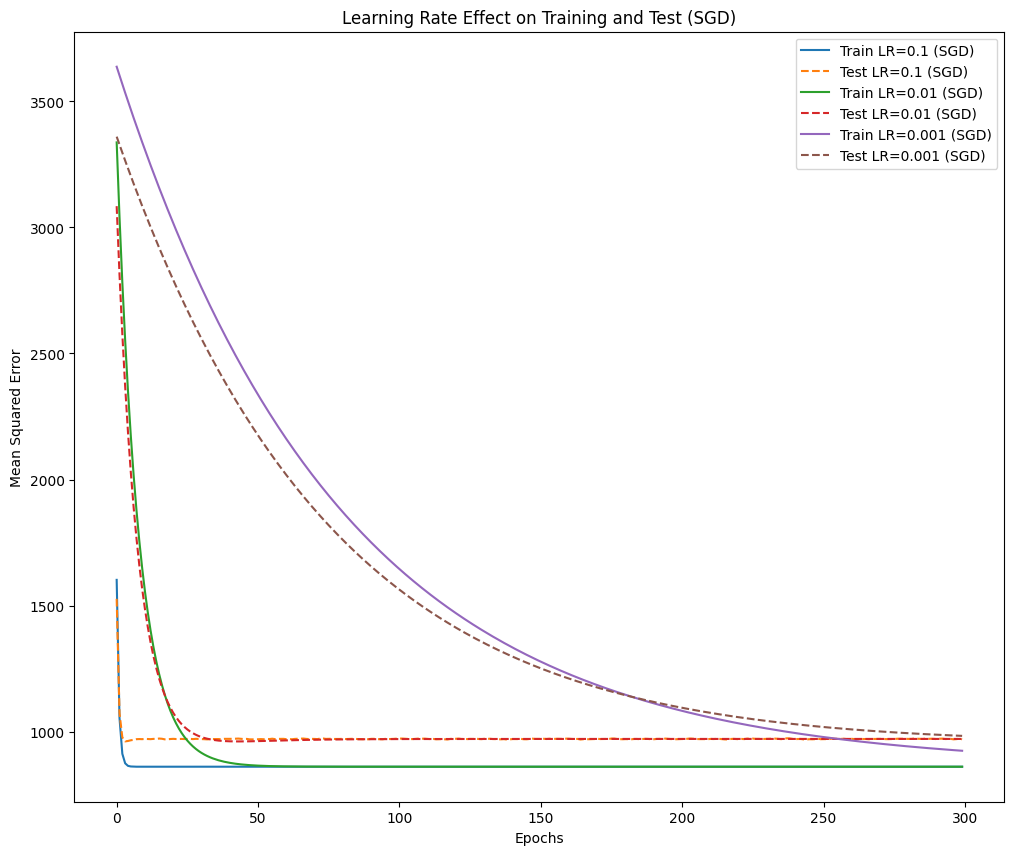

In [48]:
# Función para simular el efecto del learning rate para SGD
def simulate_learning_rate_effect(X_train, y_train, X_test, y_test, learning_rates=[0.1, 0.01, 0.001]):

    plt.figure(figsize=(12, 10))

    for lr in learning_rates:
        _, loss_history_train, loss_history_test = stochastic_gradient_descent(X_train, y_train, X_test, y_test, learning_rate=lr)
        plt.plot(loss_history_train, label=f'Train LR={lr} (SGD)')
        plt.plot(loss_history_test, label=f'Test LR={lr} (SGD)', linestyle='--')

    plt.title('Learning Rate Effect on Training and Test (SGD)')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

# Uso de la función
simulate_learning_rate_effect(X_train, y_train, X_test, y_test)


2- Sabemos que el hiperparametro learning rate es crucial en el entrenamiento de estos modelos ya que afecta en las actualizaciones de los parametros en cada paso de del entrenamiento. La eleccion del mismo es crucial ya que un learning rate suficientemente alto puede hacer que el modelo diverga (no se grafica dicha condicion) y uno muy chico que converga muy lento (como se puede ver en las graficas de simulacion de lr para gd y SGD)

### Ejercicio 7

En este ejercicio vamos a considerar la regresión logística como un problema de clasificación binaria.
La implementación de la misma podemos considerar la siguiente:

```python

class LogisticRegressionSGD():
    def __init__(self, lr=0.01, max_iter=1000, tol=1e-3, random_state=42):
        self.lr = lr
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.weights = None
        self.loss = None
        self.loss_history = None
        self.grad_history = None
        self.theta_history = None

    def fit(self, X, y):
        """
        Fit the model according to the given training data.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        y : numpy.ndarray
            The target values. An array of shape (n_samples,).

        Returns:
        self : LogisticRegressionSGD
            The fitted model.
        """
        np.random.seed(self.random_state)
        self.weights = np.random.normal(size=X.shape[1])
        self.loss_history = []
        self.grad_history = []
        self.theta_history = []

        for _ in range(self.max_iter):
            loss, grad = self._step(X, y)
            self.weights -= self.lr * grad
            self.loss_history.append(loss)
            self.grad_history.append(grad)
            self.theta_history.append(self.weights.copy())

            if len(self.loss_history) > 1:
                if np.abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                    break

        return self

    def _step(self, X, y):
        """
        Perform a single gradient step.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        y : numpy.ndarray
            The target values. An array of shape (n_samples,).

        Returns:
        loss : float
            The value of the loss function for the current value of the weights.

        grad : numpy.ndarray
            The gradient of the loss function for the current value of the weights.
        """
        N = len(y)
        y_hat = self.logit(X)
        loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
        grad = (-1 / N) * X.T.dot(y - y_hat)

        return loss, grad

    def logit(self, X):
        """
        Calculate the logit of a set of observations.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        Returns:
        logit : numpy.ndarray
            The logit of the observations. An array of shape (n_samples,).
        """
        return 1 / (1 + np.exp(-X.dot(self.weights)))
    
    def predict_proba(self, X):
        """
        Predict the probability of each class for a set of observations.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        Returns:
        proba : numpy.ndarray
            The predicted probability of each class. An array of shape (n_samples,).
        """
        return self.logit(X)
    
    def predict(self, X):
        """
        Predict the class of a set of observations.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        Returns:
        y_pred : numpy.ndarray
            The predicted class. An array of shape (n_samples,).
        """
        return (self.predict_proba(X) >= 0.5).astype(int)
    
    def score(self, X, y):
        """
        Calculate the accuracy of the model.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        y : numpy.ndarray
            The target values. An array of shape (n_samples,).

        Returns:
        score : float
            The accuracy of the model.
        """
        return np.mean(self.predict(X) == y)

```

Con esta clase, vamos a tomar el dataset de breast cancer y vamos a realizar una clasificación binaria. La idea de este ejercicio es que puedan jugar con la manera de obtener los hiperparámetros óptimos para el modelo.

Para ello van a tener que completar el método SGD de la clase LogisticRegressionSGD y luego realizar una búsqueda de grilla para encontrar los mejores hiperparámetros.

In [37]:
class LogisticRegressionSGD:
    def __init__(self, lr=0.01, max_iter=1000, tol=1e-3, random_state=42):
        self.lr = lr
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.weights = None
        self.loss = None
        self.loss_history = None
        self.grad_history = None
        self.theta_history = None

    def fit(self, X, y):
        """
        Fit the model according to the given training data.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        y : numpy.ndarray
            The target values. An array of shape (n_samples,).

        Returns:
        self : LogisticRegressionSGD
            The fitted model.
        """
        np.random.seed(self.random_state)
        self.weights = np.random.normal(size=X.shape[1])
        self.loss_history = []
        self.grad_history = []
        self.theta_history = []

        self.SGD(X, y)

        return self

    def _step(self, X, y):
        """
        Perform a single gradient step.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        y : numpy.ndarray
            The target values. An array of shape (n_samples,).

        Returns:
        loss : float
            The value of the loss function for the current value of the weights.

        grad : numpy.ndarray
            The gradient of the loss function for the current value of the weights.
        """
        N = len(y)
        y_hat = self.logit(X)
        loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
        grad = (-1 / N) * X.T.dot(y - y_hat)

        return loss, grad

    def SGD(self, X, y):
        """
        Perform the stochastic gradient descent optimization algorithm.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        y : numpy.ndarray
            The target values. An array of shape (n_samples,).
        """
        for iter in range(self.max_iter):
            loss, grad = self._step(X, y)
            if iter > 0 and np.abs(self.loss_history[-1] - loss) < self.tol:
                break
            self.weights -= self.lr * grad
            self.loss_history.append(loss)
            self.grad_history.append(grad)
            self.theta_history.append(self.weights.copy())

    def logit(self, X):
        """
        Calculate the logit of a set of observations.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        Returns:
        logit : numpy.ndarray
            The logit of the observations. An array of shape (n_samples,).
        """
        return 1 / (1 + np.exp(-X.dot(self.weights)))

    def predict_proba(self, X):
        """
        Predict the probability of each class for a set of observations.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        Returns:
        proba : numpy.ndarray
            The predicted probability of each class. An array of shape (n_samples,).
        """
        return self.logit(X)

    def predict(self, X):
        """
        Predict the class of a set of observations.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        Returns:
        y_pred : numpy.ndarray
            The predicted class. An array of shape (n_samples,).
        """
        return (self.predict_proba(X) >= 0.5).astype(int)

    def score(self, X, y):
        """
        Calculate the accuracy of the model.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        y : numpy.ndarray
            The target values. An array of shape (n_samples,).

        Returns:
        score : float
            The accuracy of the model.
        """
        return np.mean(self.predict(X) == y)



In [38]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

X,y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
# busqueda de mejores hiperparametros aplicando grilla

learning_rates_list = [0.001, 0.01, 0.1, 1]
max_iterations_list = [100, 500, 1000, 2000]

grid_results_list = []

for learning_rate in learning_rates_list:
    for max_iteration in max_iterations_list:
        model_instance = LogisticRegressionSGD(lr=learning_rate, max_iter=max_iteration)
        model_instance.fit(X_train, y_train)
        accuracy_score = model_instance.score(X_test, y_test)
        grid_results_list.append((learning_rate, max_iteration, accuracy_score))

# Mejor combinación de hiperparámetros
best_learning_rate, best_max_iteration, _ = max(grid_results_list, key=lambda x: x[2])
best_learning_rate, best_max_iteration


(1, 100)

In [40]:
# Entrenar modelo con mejores hiperparametros

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, f1_score
best_model=LogisticRegressionSGD(lr=best_learning_rate,max_iter=best_max_iteration,random_state=42)
best_model.fit(X_train,y_train)
y_pred=best_model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1_score=f1_score(y_test,y_pred)
confusion_mx=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("f1_score:", f1_score)
print("Confusion Matrix:\n", confusion_mx)
print("Classification Report:\n", report)


Accuracy: 0.9883040935672515
Recall: 0.9907407407407407
f1_score: 0.9907407407407407
Confusion Matrix:
 [[ 62   1]
 [  1 107]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        63
           1       0.99      0.99      0.99       108

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



Se puede ver que el modelo entrenado y testeado con los mejores hiperparametros obtuvo 62 TN , 1 FN, 1 FP y 107 TP. Tambien podemos observar que el accuray, recall y f1 score tienen valores altos, 0.99,0.99 y 0.99 respectivamente. Por lo que se puede concluir que el modelo es altamente efectivo mediante el uso de grilla y que tiene alta sensibilidad y efectividad.